# Assignment 1

## Part 1:


#### Dataset Creation: 
    We are provided with a synthetic dataset with four features:

Two important features: important_feature_poisson and important_feature_dummy
Two random features: random_feature_normal and random_feature_dummy
The target variable Y is created using a weighted sum of important_feature_poisson and important_feature_dummy multiplied by normal distributions.

`data = pd.DataFrame(
    {
        'important_feature_poisson': np.random.poisson(5, 1000),
        'important_feature_dummy': np.random.binomial(1, 0.5, 1000),
        'random_feature_normal': np.random.normal(0, 100, 1000),
        'random_feature_dummy': np.random.binomial(1, 0.5, 1000)
    }
)`

`data['Y'] = (
    np.random.normal(5, 3, 1000) * data['important_feature_poisson'] + 
    np.random.normal(10, 3, 1000) * data['important_feature_dummy']
)`
Task:

Build a decision tree:

- Use the given dataset with four features—two important ones (important_feature_poisson, important_feature_dummy) and two random ones (random_feature_normal, random_feature_dummy).
- Control for overfitting by tuning hyperparameters such as alpha or others (e.g., max_depth, min_samples_split). Experiment with various values to find the optimal setup.
- Compute and report the accuracy of your decision tree on the test dataset

In [46]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.legend_handler import HandlerLine2D

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

from sklearn.tree import export_graphviz
import graphviz

In [47]:
# Prepare DataFrame:

np.random.seed(0)

data = pd.DataFrame(
    {
        'important_feature_poisson': np.random.poisson(5, 1000),
        'important_feature_dummy': np.random.binomial(1, 0.5, 1000),
        'random_feature_normal': np.random.normal(0, 100, 1000),
        'random_feature_dummy': np.random.binomial(1 , 0.5, 1000)
    }
)

data['Y']= (
    np.random.normal(5, 3, 1000) * data['important_feature_poisson'] + 
    np.random.normal(10, 3, 1000) * data['important_feature_dummy']
)

data.head()

,important_feature_poisson,important_feature_dummy,random_feature_normal,random_feature_dummy,Y
0,9,1,-130.720103,0,112.687770
1,5,0,-48.052124,0,49.645250
2,6,0,72.678799,1,46.402249
3,5,1,-104.367848,1,61.457605
4,5,1,-46.958990,0,14.571259


#### Split data

In [48]:
X = data.drop(['Y'], axis=1)

# Target Variable: Defined as a combination of features with added noise.
y = data['Y'] # Target variable



In [49]:
# Split the data into training and testing sets
# 20% of the data will be used for testing, and the rest for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=0)

#### Initialize and train model

In [50]:
# Initialize and train a Decision Tree Regressor

reg = DecisionTreeRegressor()
reg.fit(X_train, y_train) # Fit the model on the training data

DecisionTreeRegressor()

### Important Features:

Text(0.5, 0, 'Relative Importance')

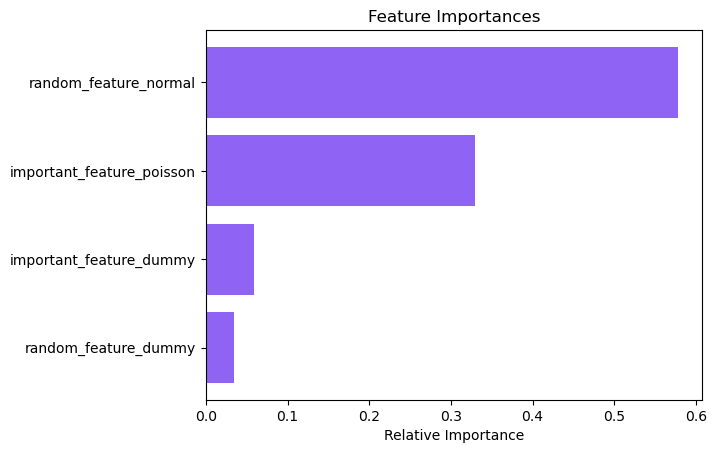

In [51]:
# Obtain feature importances from the trained model

features = X.columns.values  # Feature names
importances = reg.feature_importances_ # Importance scores for each feature
indices = np.argsort(importances) # Indices that would sort importances in ascending order
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#8f63f4', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [52]:
# Combine features and their importances into a list of tuples and sort by importance
sorted_features = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)

# Print the sorted features with their importance scores
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.8f}")

random_feature_normal: 0.57816098
important_feature_poisson: 0.32920072
important_feature_dummy: 0.05856253
random_feature_dummy: 0.03407576


### Analysis:

#### Feature Importances:
- **`random_feature_normal`** has the highest importance score (`0.57816098`), indicating it contributes most to the model's predictions.
- **`important_feature_poisson`** is the second most important feature with a score of `0.32920072`.
- **`important_feature_dummy`** and **`random_feature_dummy`** have much lower importance scores (`0.05856253` and `0.03407576`, respectively), meaning they contribute less to the prediction.

#### Plot Interpretation:
- The horizontal bar plot visualizes the relative importance of each feature, with the length of each bar corresponding to the importance score.
- The **`random_feature_normal`** feature is highlighted as the most significant, while the binary features (**`important_feature_dummy`** and **`random_feature_dummy`**) are less influential.
- This visualization helps in understanding which features are most impactful in the model and can guide feature selection or engineering for improving model performance.


## Tune Hyperparams

In [53]:
reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### 1. Tune max_depth

In [54]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
#     dt = DecisionTreeRegressor(max_depth=int(max_depth),ccp_alpha=max_alpha, random_state=42)
    dt = DecisionTreeRegressor(max_depth=int(max_depth))

    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)   
    train_acu = dt.score(X_train, y_train)
    
    # Add auc score to previous train results
    train_results.append(train_acu)
    
    y_pred = dt.predict(X_test)
    test_acu = dt.score(X_test, y_test)
    
    
    # Add auc score to previous test results
    test_results.append(test_acu)

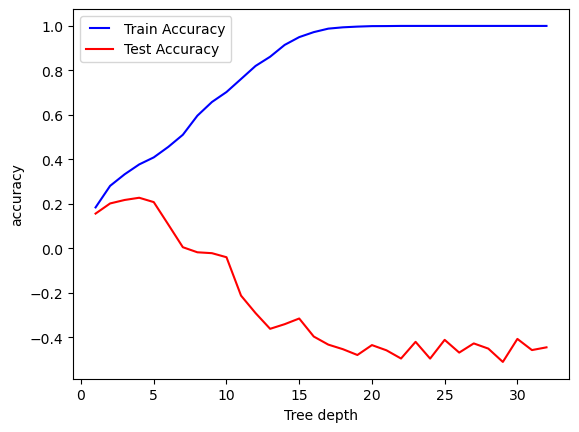

In [55]:
# Plot results for max_depth
line1, = plt.plot(max_depths, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('accuracy')
plt.xlabel('Tree depth')
plt.show()

### Analysis

Increasing `max_depth` generally increases training accuracy but can lead to **overfitting**, causing a decrease in test accuracy.

It is suggested to keep `max_depth` relatively low to avoid overfitting. Increasing `max_depth` leads to model **overfitting**, so it is advisable to keep the `max_depth` parameter low, i.e., keep the tree length short.


In [56]:
max_depth_suggested = max_depths[np.argmax(test_results)]
max_depth_suggested

4.0

### 2. Tune min_samples_split

In [57]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeRegressor(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)   
    train_acu = dt.score(X_train, y_train)
    
    # Add auc score to previous train results
    train_results.append(train_acu)
    
    y_pred = dt.predict(X_test)
    test_acu = dt.score(X_test, y_test)
    
    # Add auc score to previous test results
    test_results.append(test_acu)

Text(0.5, 0, 'min samples split')

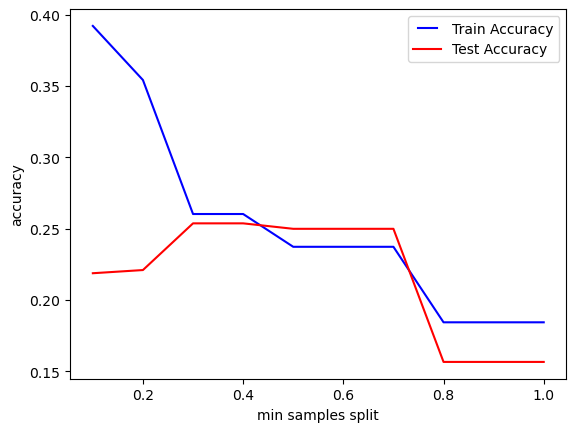

In [58]:
# Plot results for min_samples_split

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('accuracy')
plt.xlabel('min samples split')

### Analysis

Higher `min_samples_split` values typically lead to **underfitting** as the model may not capture enough complexity. A balance needs to be found to ensure the model generalizes well.

Considering more samples leads to an **underfitting** case, where the model cannot learn enough about the data.


### 3. Tune min_samples_leaf

In [59]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)   
    train_acu = dt.score(X_train, y_train)
    
    # Add auc score to previous train results
    train_results.append(train_acu)
    
    y_pred = dt.predict(X_test)
    test_acu = dt.score(X_test, y_test)
    
    # Add auc score to previous test results
    test_results.append(test_acu)

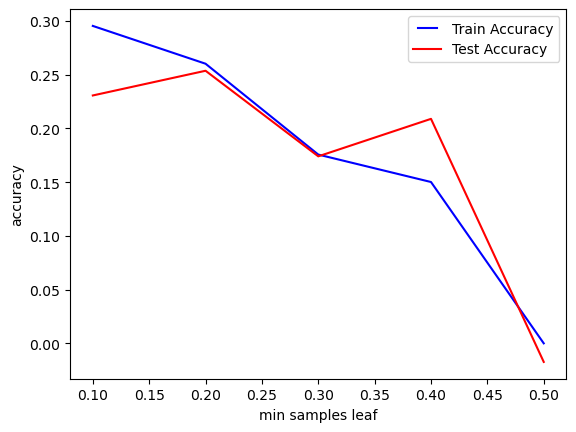

In [60]:
# Plot results for min_samples_leaf

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('accuracy')
plt.xlabel('min samples leaf')
plt.show()

### Analysis

Increasing `min_samples_leaf` values also tends to lead to **underfitting**, as the model becomes less flexible. Similar to the previous parameter, increasing this value may cause **underfitting**.

### 4. Tune max_features

In [61]:
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeRegressor(max_features=max_feature)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)   
    train_acu = dt.score(X_train, y_train)
    
    # Add auc score to previous train results
    train_results.append(train_acu)
    
    y_pred = dt.predict(X_test)
    test_acu = dt.score(X_test, y_test)
      
    # Add auc score to previous test results
    test_results.append(test_acu)

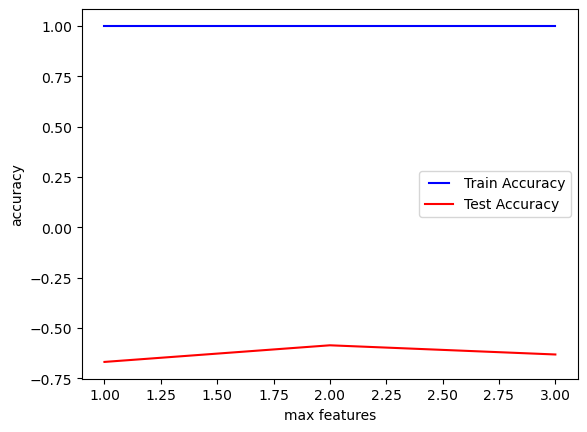

In [62]:
# Plot results for max_features

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(max_features, test_results, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('accuracy')
plt.xlabel('max features')
plt.show()

### Analysis

Increasing `max_features` may also cause **overfitting** if too many features are used. A balance is needed. This is an **overfitting** case.


### 5. Tune ccp_alpha (Cost Complexity Pruning Alpha)

In [63]:
path = reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [64]:
ccp_alphas[:10]

array([0.00000000e+00, 2.03551041e-07, 2.02561301e-06, 5.20941620e-06,
       5.31904773e-06, 9.75722068e-06, 1.44785736e-05, 1.94869817e-05,
       2.72502058e-05, 3.31391162e-05])

In [65]:
impurities[:10]

array([4.00365201e-14, 2.03551081e-07, 2.22916409e-06, 7.43858029e-06,
       1.27576280e-05, 2.25148487e-05, 3.69934223e-05, 5.64804040e-05,
       8.37306098e-05, 1.16869726e-04])

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

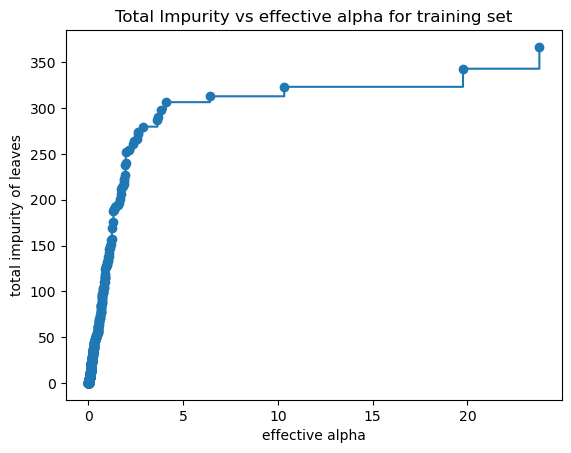

In [66]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [67]:
# Train models for different alpha values

In [68]:
regs = []
for i,ccp_alpha in enumerate(ccp_alphas):
    reg = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    reg.fit(X_train, y_train)
    regs.append(reg)

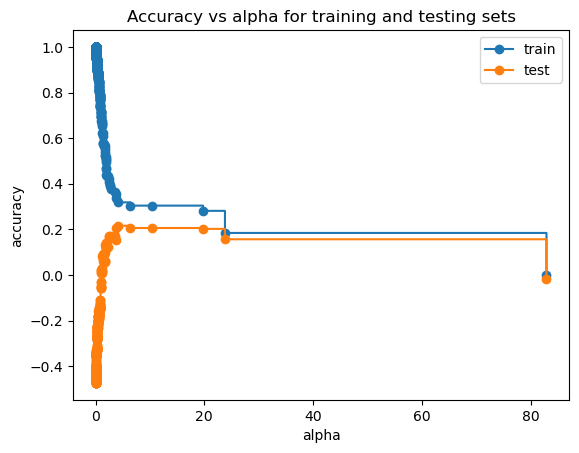

In [69]:
train_scores = [reg.score(X_train, y_train) for reg in regs]
test_scores = [reg.score(X_test, y_test) for reg in regs]

# Plot accuracy vs alpha
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()

In [70]:
# Determine the optimal alpha

max_alpha = ccp_alphas[np.argmax(test_scores)]
max_alpha

4.087482063658413

### Analysis of Hyperparameter Tuning

#### max_depth

Increasing the depth of the tree generally improves the training accuracy but may lead to overfitting, reducing test accuracy. It is advisable to keep `max_depth` low to avoid overfitting.

#### min_samples_split

A higher value for `min_samples_split` might lead to underfitting, where the model fails to learn the underlying patterns of the data. A moderate value is preferred.

#### min_samples_leaf

Increasing `min_samples_leaf` also tends to cause underfitting. The value should be tuned to find a balance between capturing enough data and avoiding overfitting.

#### max_features

Similar to `max_depth`, increasing `max_features` can lead to overfitting. The number of features should be optimized to balance between model complexity and generalization.

#### ccp_alpha (Cost Complexity Pruning Alpha)

This parameter controls pruning of the decision tree to prevent overfitting. Higher values of `ccp_alpha` lead to simpler models. The optimal `ccp_alpha` is selected based on the maximum test accuracy, providing a balanced model that avoids both overfitting and underfitting.


#### Re-train the Decision Tree Regressor with the optimal alpha

Text(0.5, 0, 'Relative Importance')

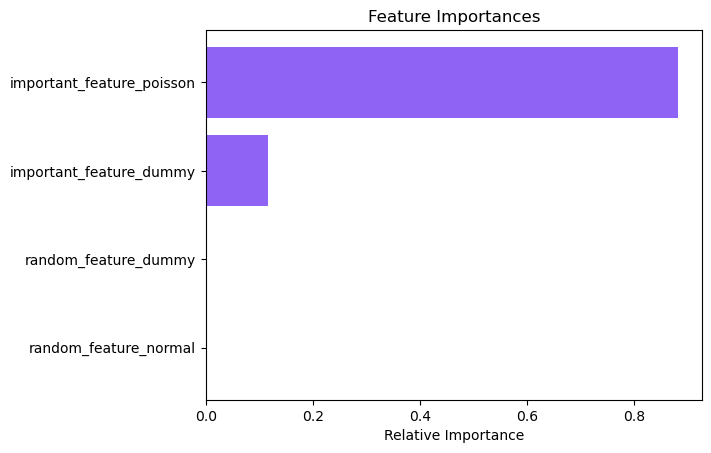

In [71]:
reg = DecisionTreeRegressor(ccp_alpha=max_alpha, random_state=0)
reg.fit(X_train, y_train)

# Plot feature importances after tuning
features = X.columns.values
importances = reg.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#8f63f4', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [72]:
importances

array([0.88308313, 0.11691687, 0.        , 0.        ])

#### Evaluate the model

In [73]:
y_pred = reg.predict(X_test)
print("R^2 : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 :  0.21571786049139374
MAE : 11.833088044321974
RMSE: 15.950753731482113


In [ ]:
# Export and visualize the decision tree

dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns,  
                           filled=True, rounded=True,  
                           special_characters=True)  

graph = graphviz.Source(dot_data)  
graph

# Part 2:

**Dataset:**

- Use the meteorological dataset for Traverse City, Michigan, for the year 2012 (MI-14850-2011Fall-2012Spring.csv).
- Refer to the professor’s decision tree notebook for detailed instructions on how to download and preprocess the dataset.

**Tasks:**

- Compute system entropy for the precipitation feature:
- Quantize the "precipitation" feature into 4 categories:
- No precipitation
- Little precipitation
- Medium precipitation
- Lots of precipitation
- Use this quantized feature to calculate the entropy of the system, which will help understand the information gain when building your decision tree.

### EDA

In [ ]:
# Load the meteorological dataset
df = pd.read_csv('MI-14850-2011Fall-2012Spring.csv', header=4)
df.drop(columns=[df.columns[-1]], inplace=True)
df = df.iloc[:-11, :]
df.head()

,Date,Time,Temp (F),RH (%),Dewpt (F),Wind Spd (mph),Wind Direction (deg),Peak Wind Gust(mph),Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F)
0,2011-09-01,00:53,65,84,60,0,0,m,0,m,m,10,992.3,1015.00,1015.2,0.00,NC,NC
1,2011-09-01,01:53,62,89,59,0,0,m,0,m,m,6,992.3,1014.80,1015.2,0.00,NC,NC
2,2011-09-01,02:53,62,89,59,0,0,m,0,m,m,6,992.0,1014.80,1014.9,0.00,NC,NC
3,2011-09-01,03:53,61,93,59,0,0,m,0,m,m,4,992.0,1014.70,1014.9,0.00,NC,NC
4,2011-09-01,04:53,60,92,58,0,0,m,0,m,m,3,992.0,1014.80,1014.9,0.00,NC,NC


In [76]:
# Check for missing values
df.isnull().sum()

Date                    0
Time                    0
Temp (F)                0
RH (%)                  0
Dewpt (F)               0
Wind Spd (mph)          0
Wind Direction (deg)    0
Peak Wind Gust(mph)     0
Low Cloud Ht (ft)       0
Med Cloud Ht (ft)       0
High Cloud Ht (ft)      0
Visibility (mi)         0
Atm Press (hPa)         0
Sea Lev Press (hPa)     0
Altimeter (hPa)         0
Precip (in)             0
Wind Chill (F)          0
Heat Index (F)          0
dtype: int64

In [77]:
df.columns

Index(['Date', 'Time', 'Temp (F)', 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)',
       'Wind Direction (deg)', 'Peak Wind Gust(mph)', 'Low Cloud Ht (ft)',
       'Med Cloud Ht (ft)', 'High Cloud Ht (ft)', 'Visibility (mi)',
       'Atm Press (hPa)', 'Sea Lev Press (hPa)', 'Altimeter (hPa)',
       'Precip (in)', 'Wind Chill (F)', 'Heat Index (F)'],
      dtype='object')

In [78]:
# Display the unique values for each column to understand the data

for col in df.columns:
    print(col, df[col].unique())
    print("-"*100)

Date ['2011-09-01' '2011-09-02' '2011-09-03' '2011-09-04' '2011-09-05'
 '2011-09-06' '2011-09-07' '2011-09-08' '2011-09-09' '2011-09-10'
 '2011-09-11' '2011-09-12' '2011-09-13' '2011-09-14' '2011-09-15'
 '2011-09-16' '2011-09-17' '2011-09-18' '2011-09-19' '2011-09-20'
 '2011-09-21' '2011-09-22' '2011-09-23' '2011-09-24' '2011-09-25'
 '2011-09-26' '2011-09-27' '2011-09-28' '2011-09-29' '2011-09-30'
 '2011-10-01' '2011-10-02' '2011-10-03' '2011-10-04' '2011-10-05'
 '2011-10-06' '2011-10-07' '2011-10-08' '2011-10-09' '2011-10-10'
 '2011-10-11' '2011-10-12' '2011-10-13' '2011-10-14' '2011-10-15'
 '2011-10-16' '2011-10-17' '2011-10-18' '2011-10-19' '2011-10-20'
 '2011-10-21' '2011-10-22' '2011-10-23' '2011-10-24' '2011-10-25'
 '2011-10-26' '2011-10-27' '2011-10-28' '2011-10-29' '2011-10-30'
 '2011-10-31' '2011-11-01' '2011-11-02' '2011-11-03' '2011-11-04'
 '2011-11-05' '2011-11-06' '2011-11-07' '2011-11-08' '2011-11-09'
 '2011-11-10' '2011-11-11' '2011-11-12' '2011-11-13' '2011-11-14'
 '201

In [79]:
# Replace missing or invalid data with 0 and convert columns to appropriate data types

df['Temp (F)'] = df['Temp (F)'].apply(lambda x: 0 if x == 'M' else int(x))
df['RH (%)'] = df['RH (%)'].apply(lambda x: 0 if x == 'm' else int(x))
df['Dewpt (F)'] = df['Dewpt (F)'].apply(lambda x: 0 if x == 'M' else int(x))
df['Wind Spd (mph)'] = df['Wind Spd (mph)'].apply(lambda x: 0 if x == 'M' else int(x))
df['Wind Direction (deg)'] = df['Wind Direction (deg)'].apply(lambda x: 0 if x == 'M' else int(x))
df['Peak Wind Gust(mph)'] = df['Peak Wind Gust(mph)'].apply(lambda x: 0 if x == 'm' else int(x))
df['Low Cloud Ht (ft)'] = df['Low Cloud Ht (ft)'].apply(lambda x: 0 if x == 'M' else int(x))
df['Med Cloud Ht (ft)'] = df['Med Cloud Ht (ft)'].apply(lambda x: 0 if x == 'm' else int(x))
df['High Cloud Ht (ft)'] = df['High Cloud Ht (ft)'].apply(lambda x: 0 if x == 'm' else int(x))
df['Visibility (mi)'] = df['Visibility (mi)'].apply(lambda x: 0 if x == 'M' else float(x))
df['Sea Lev Press (hPa)'] = df['Sea Lev Press (hPa)'].apply(lambda x: 0 if x == 'M' else float(x))
df['Precip (in)'] = df['Precip (in)'].apply(lambda x: 0 if x=='m' else float(x))
df['Wind Chill (F)'] = df['Wind Chill (F)'].apply(lambda x: 0 if x=='M' or x=='NC' else int(x))
df['Heat Index (F)'] = df['Heat Index (F)'].apply(lambda x: 0 if x=='M' or x=='NC' else int(x))

In [80]:
# Display the unique values again to ensure proper data conversion

for col in df.columns:
    print(col, df[col].unique())
    print("-"*100)

Date ['2011-09-01' '2011-09-02' '2011-09-03' '2011-09-04' '2011-09-05'
 '2011-09-06' '2011-09-07' '2011-09-08' '2011-09-09' '2011-09-10'
 '2011-09-11' '2011-09-12' '2011-09-13' '2011-09-14' '2011-09-15'
 '2011-09-16' '2011-09-17' '2011-09-18' '2011-09-19' '2011-09-20'
 '2011-09-21' '2011-09-22' '2011-09-23' '2011-09-24' '2011-09-25'
 '2011-09-26' '2011-09-27' '2011-09-28' '2011-09-29' '2011-09-30'
 '2011-10-01' '2011-10-02' '2011-10-03' '2011-10-04' '2011-10-05'
 '2011-10-06' '2011-10-07' '2011-10-08' '2011-10-09' '2011-10-10'
 '2011-10-11' '2011-10-12' '2011-10-13' '2011-10-14' '2011-10-15'
 '2011-10-16' '2011-10-17' '2011-10-18' '2011-10-19' '2011-10-20'
 '2011-10-21' '2011-10-22' '2011-10-23' '2011-10-24' '2011-10-25'
 '2011-10-26' '2011-10-27' '2011-10-28' '2011-10-29' '2011-10-30'
 '2011-10-31' '2011-11-01' '2011-11-02' '2011-11-03' '2011-11-04'
 '2011-11-05' '2011-11-06' '2011-11-07' '2011-11-08' '2011-11-09'
 '2011-11-10' '2011-11-11' '2011-11-12' '2011-11-13' '2011-11-14'
 '201

In [81]:
# Check the shape and summary statistics of the DataFrame

df.shape

(5112, 18)

In [82]:
df.describe()

,Temp (F),RH (%),Dewpt (F),Wind Spd (mph),Wind Direction (deg),Peak Wind Gust(mph),Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F)
count,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000,5112.00000,5112.000000,5112.000000,5112.000000,5112.000000
mean,41.654734,70.461072,32.188967,6.219875,142.147887,4.328052,4722.789515,3791.549296,1404.460094,8.760172,992.006142,971.47097,1014.905458,0.002735,12.078443,1.151017
std,15.278396,15.586896,13.729815,5.173508,127.981650,9.180454,6026.711477,6825.460108,4603.307495,2.506418,8.198524,207.17376,8.351907,0.014668,15.053089,9.704310
min,0.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,965.100000,0.00000,987.500000,0.000000,-7.000000,0.000000
25%,31.000000,60.000000,23.000000,3.000000,0.000000,0.000000,1200.000000,0.000000,0.000000,9.000000,987.000000,1009.40000,1009.800000,0.000000,0.000000,0.000000
50%,38.000000,72.000000,31.000000,6.000000,160.000000,0.000000,2700.000000,0.000000,0.000000,10.000000,993.000000,1015.90000,1015.900000,0.000000,0.000000,0.000000
75%,51.000000,83.000000,42.000000,9.000000,250.000000,0.000000,5000.000000,4400.000000,0.000000,10.000000,998.000000,1021.70000,1021.000000,0.000000,26.000000,0.000000
max,88.000000,100.000000,71.000000,28.000000,360.000000,40.000000,25000.000000,25000.000000,25000.000000,10.000000,1010.000000,1034.40000,1033.200000,0.260000,46.000000,92.000000


In [83]:
# Quantize the 'Precip (in)' feature into categories

df['Precipitation_Type'] = pd.cut(
    df['Precip (in)'], 
    bins=[0.0,0.06, 0.12, 0.18, 0.30],
    labels=['No precipitation', 'Little precipitation', 'Medium precipitation', 'Lots of precipitation'],
    include_lowest=True
)

df[['Precip (in)', 'Precipitation_Type']].head()

,Precip (in),Precipitation_Type
0,0.0,No precipitation
1,0.0,No precipitation
2,0.0,No precipitation
3,0.0,No precipitation
4,0.0,No precipitation


In [84]:
category_counts = df['Precipitation_Type'].value_counts()

probabilities = category_counts / len(df)

# Calculate the entropy of the precipitation feature

entropy = -np.sum(probabilities * np.log2(probabilities))

print(f'Entropy of the Precipitation system (root node) is: {entropy}')


Entropy of the Precipitation system (root node) is: 0.11412747045950192


In [85]:
# Output: Entropy of the Precipitation system (root node) is: 0.11412747045950192

#### Compute the correlation matrix and plot the heatmap


In [86]:
feature_columns = ['Temp (F)', 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)',
       'Wind Direction (deg)', 'Peak Wind Gust(mph)', 'Low Cloud Ht (ft)',
       'Med Cloud Ht (ft)', 'High Cloud Ht (ft)', 'Visibility (mi)',
       'Atm Press (hPa)', 'Sea Lev Press (hPa)', 'Altimeter (hPa)',
        'Wind Chill (F)', 'Heat Index (F)']
X = df[feature_columns]
y = df['Precipitation_Type']

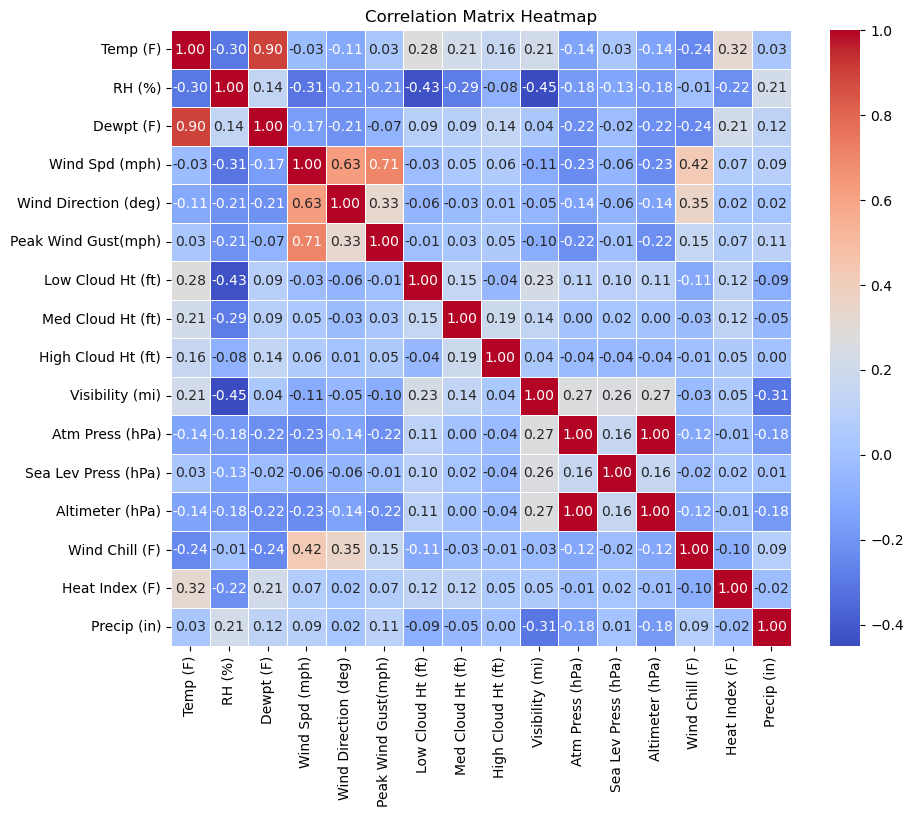

In [87]:
correlation_matrix = df[feature_columns + ['Precip (in)']].corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [88]:
X.shape, y.shape

((5112, 15), (5112,))

### Model building

In [89]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize and train the Decision Tree Classifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [90]:
# Predict on the test set

y_pred = model.predict(X_test)

# Print model performance metrics

print('Training Score:', model.score(X_train, y_train))
print('Testing Score:', model.score(X_test, y_test))

Training Score: 1.0
Testing Score: 0.9745845552297165


### Hyper Paramerter Tuning:

Try different parameter value of **ccp_alpha**

In [91]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [92]:
cls = []
for i,ccp_alpha in enumerate(ccp_alphas):
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    cls.append(dt)

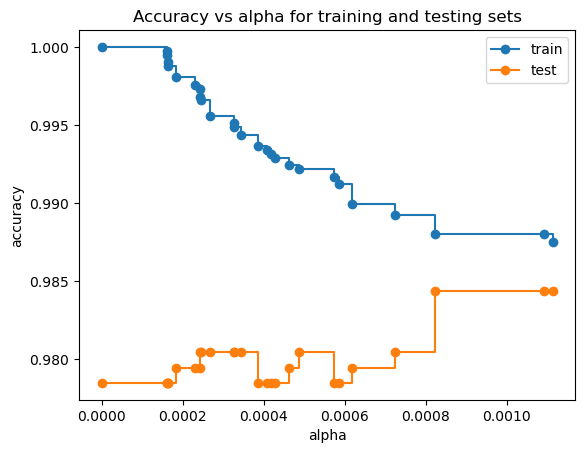

In [93]:
train_scores = [cl.score(X_train, y_train) for cl in cls]
test_scores = [cl.score(X_test, y_test) for cl in cls]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()

In [94]:
max_ccp_alpha = ccp_alphas[np.argmax(test_scores)]
max_ccp_alpha

0.0008225857455497958

In [95]:
model = DecisionTreeClassifier(ccp_alpha=max_ccp_alpha)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0008225857455497958)

In [96]:
y_pred = model.predict(X_test)

print('Training Score:', model.score(X_train, y_train))
print('Testing Score:', model.score(X_test, y_test))

Training Score: 0.9880166299828809
Testing Score: 0.9843597262952102


# Analysis

## Entropy Calculation

The entropy of the precipitation system is calculated to be approximately 0.114. This value indicates a low level of impurity or disorder in the data, suggesting that the precipitation feature is relatively homogeneous after quantization. Lower entropy means that the feature provides relatively clear information about the different categories of precipitation.

## Preprocessing Steps

Missing or invalid data was replaced with zeros, and columns were converted to appropriate data types. This ensures that all data used in the analysis is numeric and avoids issues with non-numeric values.

## Quantization of Precipitation

The 'Precip (in)' feature was quantized into four categories: 'No precipitation', 'Little precipitation', 'Medium precipitation', and 'Lots of precipitation'. This transformation helps in analyzing the categorical impact of precipitation on the decision tree.

## Correlation Matrix

The heatmap of the correlation matrix shows the relationship between the precipitation feature and other meteorological features. This visualization helps in understanding which features have strong relationships with precipitation, which can be useful for feature selection in the decision tree model.

## Decision Tree Classifier Performance

The Decision Tree Classifier achieved a perfect score on the training set (1.0) and a high score on the test set (approximately 0.975). This indicates that the model performs well in classifying the precipitation types based on the features. However, the high training score suggests that the model may be **overfitting**, as it performs exceptionally well on training data.
